
# MACHINE LEARNING PROJECT


## TITLE: *CREDIT CARD FRAUD DETECTION USING NAIVE BAYES*





### MUNEEBA AHMED<br> 22k-5365<br>MS(DS)<br>![My Image](card_ml.png)
      




##  PROBLEM STATEMENT

- Credit card companies need to have the ability to recognize fraudulent credit card transactions so that customers are not charged for items that they did not purchase.

- Datasets contains transactions made by credit cards in September 2013 by european cardholders. This dataset presents transactions that occurred in two days, where we have 492 frauds out of 284,807 transactions. The dataset is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- The data contains only numerical input variables which are the result of a PCA transformation. Unfortunately, due to confidentiality issues,  the original features and more background information about the data is not provided. 

- Input Features: V1, V2, ... V28 are the principal components obtained with PCA, the only features which have not been transformed with PCA are 'Time' and 'Amount'. Feature 'Time' contains the seconds elapsed between each transaction and the first transaction in the dataset. The feature 'Amount' is the transaction Amount, this feature can be used for example-dependant cost-senstive learning. 

- Output: 1 in case of fraud and 0 otherwise.
- Link to the dataset: https://www.kaggle.com/mlg-ulb/creditcardfraud/home

## 1. Introduction:

### What is credit card fraud?
Credit card fraud is a type of identity theft. It happens when someone steals your credit card information to make unauthorized transactions.
Nowadays, majority of financial transactions takes place online. This trend has been driven by advances in technology, such as the internet, mobile devices, and digital payment systems, which have made it easier and more convenient for people to manage their finances from anywhere at any time. This has led to an increase in credit card frauds.

### Why use Naive Bayes to solve this problem?

Naive Bayes is a popular machine learning algorithm that is commonly used for classification tasks, such as fraud detection in credit card transactions. There are a few reasons why Naive Bayes is a good fit for this type of problem:

- **Efficient and Scalable:** Naive Bayes is computationally efficient and scalable, which makes it well-suited for processing large amounts of credit card transaction data in real-time.

- **Handles Large Feature Spaces:** Credit card transactions involve a large number of features, such as transaction amount, location, time, and user behavior patterns. Naive Bayes is capable of handling large feature spaces and can effectively learn from the features to identify patterns that are indicative of fraud. There are 28 features (PCA transformed) and time and amount that are not transformed.

- **Handles Imbalanced Data:** Fraudulent transactions are typically rare compared to legitimate transactions, resulting in imbalanced data sets. Naive Bayes is able to handle imbalanced data and still make accurate predictions, as it focuses on the probability of each class rather than the absolute number of instances.The dataset that I am using is highly unbalanced, the positive class (frauds) account for 0.172% of all transactions.

- **Independence Assumption:** Naive Bayes assumes that the features are independent of each other, which may not be strictly true in credit card transactions. However, this assumption can still lead to reasonable predictions and can help in identifying anomalies in the data.

Overall, Naive Bayes is a good choice for credit card fraud detection due to its efficiency, scalability, ability to handle large feature spaces and imbalanced data, and its ability to make accurate predictions despite making a naive independence assumption.

## 2. METHODOLOGY:

![My Image](image_ml.png)

## 3. PROCESS:

### STEP #0:  IMPORT LIBRARIES

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

### STEP #1: IMPORT DATASET

In [2]:
creditcard_df = pd.read_csv("creditcard.csv")

In [3]:
creditcard_df.shape


(284807, 31)

In [4]:
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


In [5]:
creditcard_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 284807 entries, 0 to 284806
Data columns (total 31 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   Time    284807 non-null  float64
 1   V1      284807 non-null  float64
 2   V2      284807 non-null  float64
 3   V3      284807 non-null  float64
 4   V4      284807 non-null  float64
 5   V5      284807 non-null  float64
 6   V6      284807 non-null  float64
 7   V7      284807 non-null  float64
 8   V8      284807 non-null  float64
 9   V9      284807 non-null  float64
 10  V10     284807 non-null  float64
 11  V11     284807 non-null  float64
 12  V12     284807 non-null  float64
 13  V13     284807 non-null  float64
 14  V14     284807 non-null  float64
 15  V15     284807 non-null  float64
 16  V16     284807 non-null  float64
 17  V17     284807 non-null  float64
 18  V18     284807 non-null  float64
 19  V19     284807 non-null  float64
 20  V20     284807 non-null  float64
 21  V21     28

In [6]:
non_fraud = creditcard_df[creditcard_df['Class']==0]

In [7]:
fraud = creditcard_df[creditcard_df['Class']==1]

In [8]:
fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
541,406.0,-2.312227,1.951992,-1.609851,3.997906,-0.522188,-1.426545,-2.537387,1.391657,-2.770089,...,0.517232,-0.035049,-0.465211,0.320198,0.044519,0.177840,0.261145,-0.143276,0.00,1
623,472.0,-3.043541,-3.157307,1.088463,2.288644,1.359805,-1.064823,0.325574,-0.067794,-0.270953,...,0.661696,0.435477,1.375966,-0.293803,0.279798,-0.145362,-0.252773,0.035764,529.00,1
4920,4462.0,-2.303350,1.759247,-0.359745,2.330243,-0.821628,-0.075788,0.562320,-0.399147,-0.238253,...,-0.294166,-0.932391,0.172726,-0.087330,-0.156114,-0.542628,0.039566,-0.153029,239.93,1
6108,6986.0,-4.397974,1.358367,-2.592844,2.679787,-1.128131,-1.706536,-3.496197,-0.248778,-0.247768,...,0.573574,0.176968,-0.436207,-0.053502,0.252405,-0.657488,-0.827136,0.849573,59.00,1
6329,7519.0,1.234235,3.019740,-4.304597,4.732795,3.624201,-1.357746,1.713445,-0.496358,-1.282858,...,-0.379068,-0.704181,-0.656805,-1.632653,1.488901,0.566797,-0.010016,0.146793,1.00,1


In [9]:
non_fraud.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


### STEP: 2  VISUALIZE THE DATASET

C:\Users\Beyond\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Class', ylabel='count'>

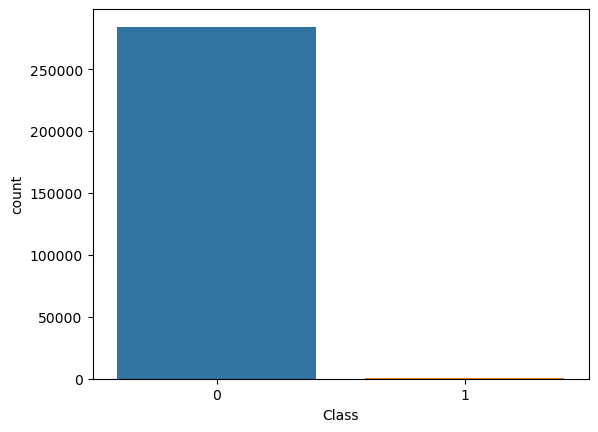

In [10]:
sns.countplot(creditcard_df['Class'], label = "Count") 
# Data is extremely unbalanced

In [11]:
print( 'fraud transactions percentage =', (len(fraud) / len(creditcard_df) )*100,"%")

fraud transactions percentage = 0.1727485630620034 %


<AxesSubplot:>

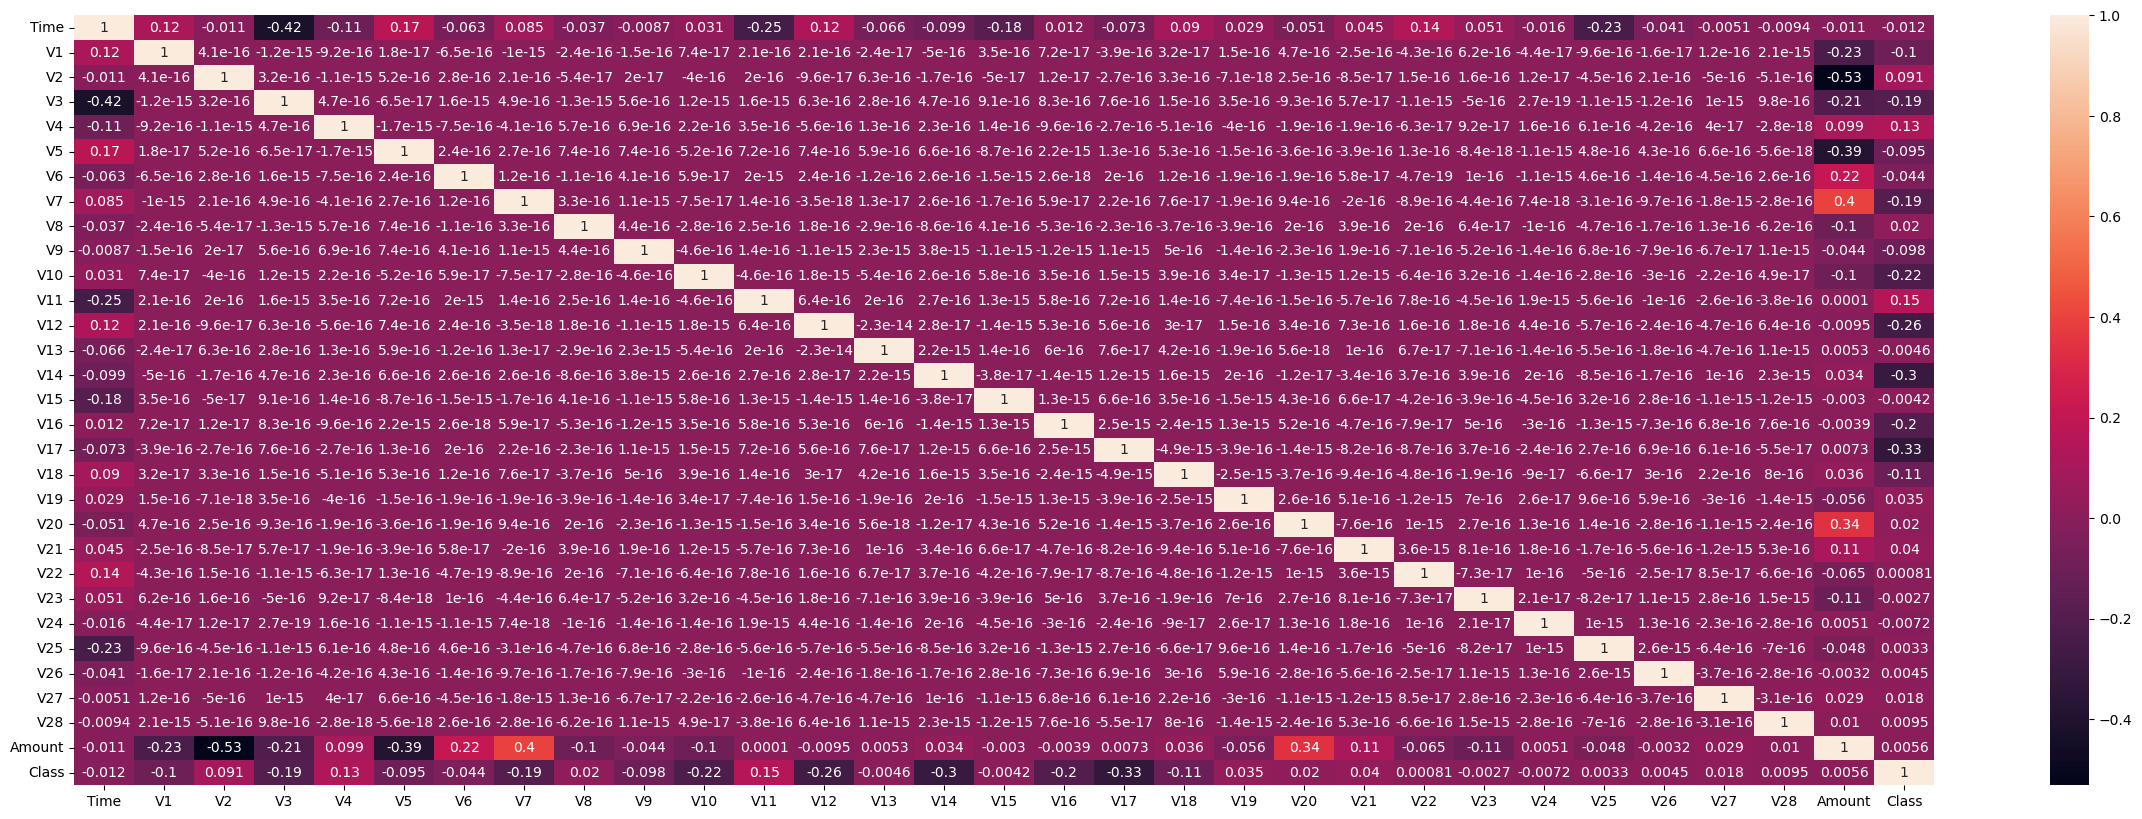

In [12]:
# Now lets see the correlation between the features
plt.figure(figsize=(30,10)) 
sns.heatmap(creditcard_df.corr(), annot=True)

In [13]:
column_headers = creditcard_df.columns.values
column_headers

array(['Time', 'V1', 'V2', 'V3', 'V4', 'V5', 'V6', 'V7', 'V8', 'V9',
       'V10', 'V11', 'V12', 'V13', 'V14', 'V15', 'V16', 'V17', 'V18',
       'V19', 'V20', 'V21', 'V22', 'V23', 'V24', 'V25', 'V26', 'V27',
       'V28', 'Amount', 'Class'], dtype=object)

No artists with labels found to put in legend.  Note that artists whose label start with an underscore are ignored when legend() is called with no argument.


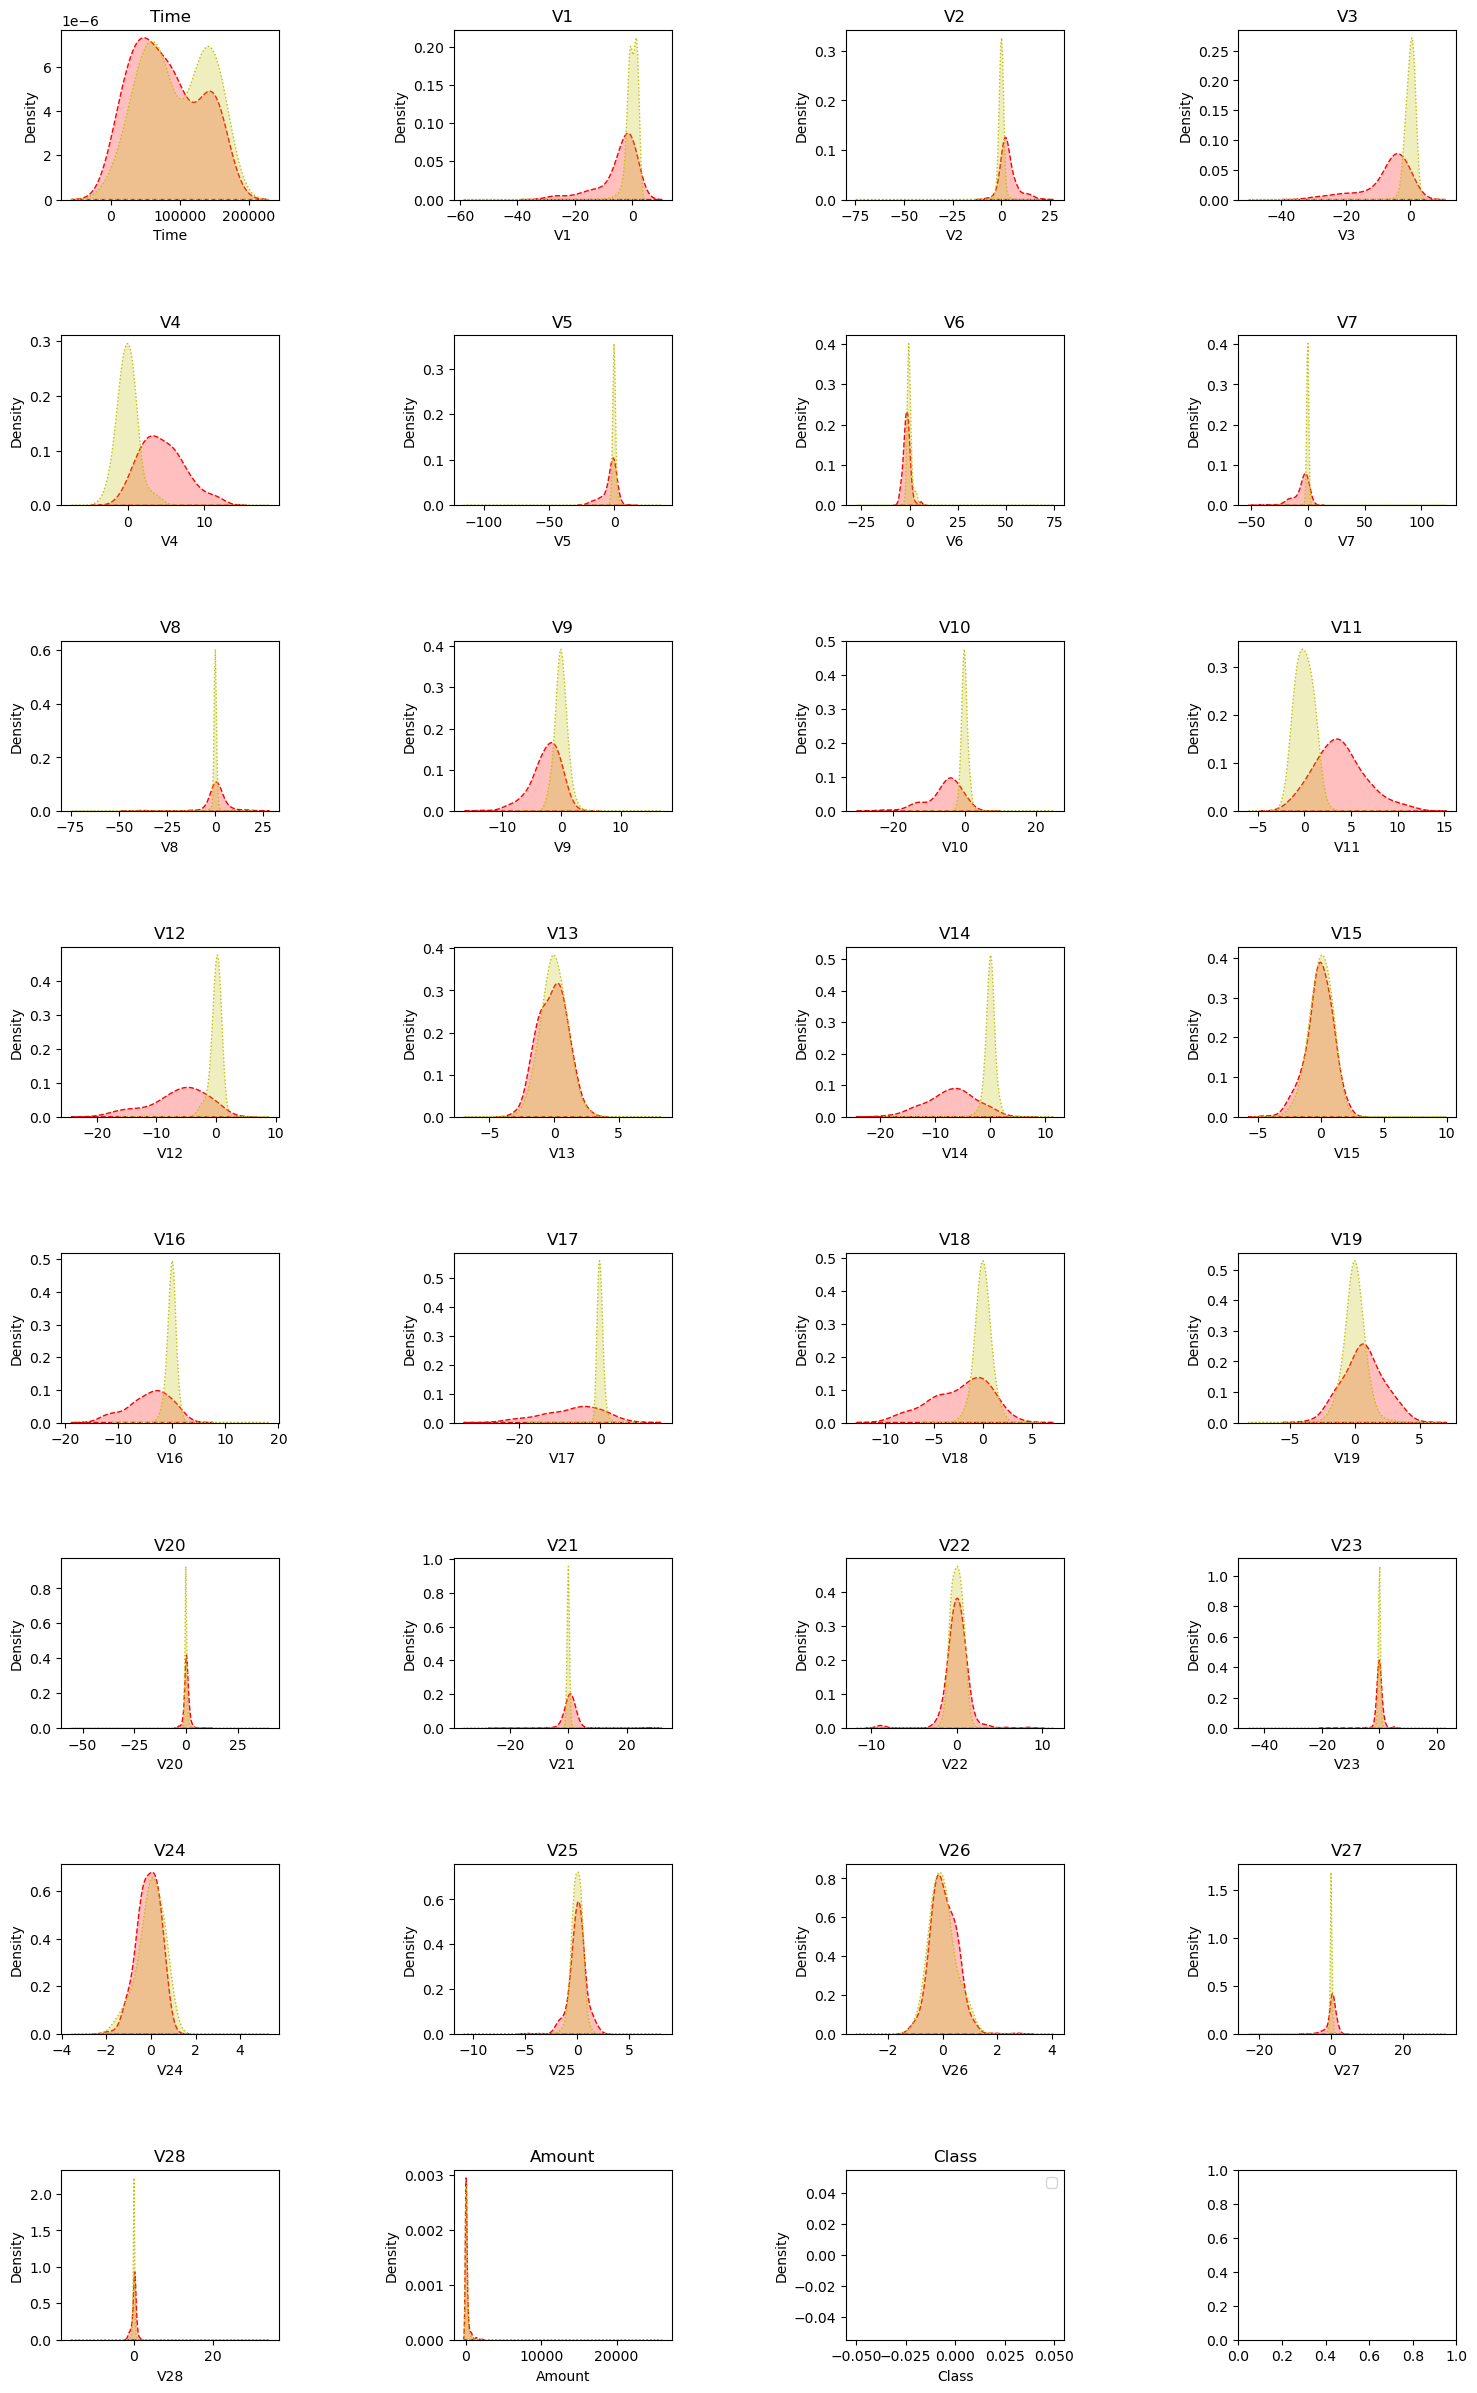

In [14]:
# kernel density estimation (KDE) is a non-parametric way to estimate the probability density function of a random variable.
i = 1

fig, ax = plt.subplots(8,4,figsize=(18,30))
plt.subplots_adjust(wspace=0.8, hspace=0.8)
for column_header in column_headers:    
    plt.subplot(8,4,i)
    sns.kdeplot(fraud[column_header], bw_method = 0.4, label = "Fraud", shade=True, color="r", linestyle="--",warn_singular=False)
    sns.kdeplot(non_fraud[column_header], bw_method = 0.4, label = "Non Fraud", shade=True, color= "y", linestyle=":", warn_singular=False)
    plt.title(column_header, fontsize=12 )
    i = i + 1
    
plt.legend()   
plt.show()



### STEP 3: CREATE TRAIN AND TEST DATASETS

In [15]:
# Scaling or standardizing the "amount" column and rename it "Amount_norm"

from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
creditcard_df['Amount_Norm'] = sc.fit_transform(creditcard_df['Amount'].values.reshape(-1,1))


In [16]:
creditcard_df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V22,V23,V24,V25,V26,V27,V28,Amount,Class,Amount_Norm
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0,-0.073403


In [17]:
#Drop the original "amount" column
creditcard_df = creditcard_df.drop(['Amount'], axis = 1)

In [18]:
# Splitting the data sets into x and y
# x contains the dataset/features
# y contains the labels

X = creditcard_df.drop(['Class'],axis=1) 
y = creditcard_df['Class']

In [19]:
X.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount_Norm
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,0.251412,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0.244964
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.069083,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,-0.342475
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.524980,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,1.160686
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.208038,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0.140534
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,0.408542,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,-0.073403


In [20]:
y.head()

0    0
1    0
2    0
3    0
4    0
Name: Class, dtype: int64

In [21]:
from sklearn.model_selection import train_test_split

In [22]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

### STEP 4 : TRAINING THE MODEL

In [23]:
X_train.shape

(227845, 30)

In [24]:
y_train.shape

(227845,)

In [25]:
X_test.shape

(56962, 30)

In [26]:
y_test.shape

(56962,)

In [27]:
from sklearn.naive_bayes import GaussianNB 
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)

GaussianNB()

### STEP#5: EVALUATING THE MODEL

In [28]:
from sklearn.metrics import classification_report, confusion_matrix

<AxesSubplot:>

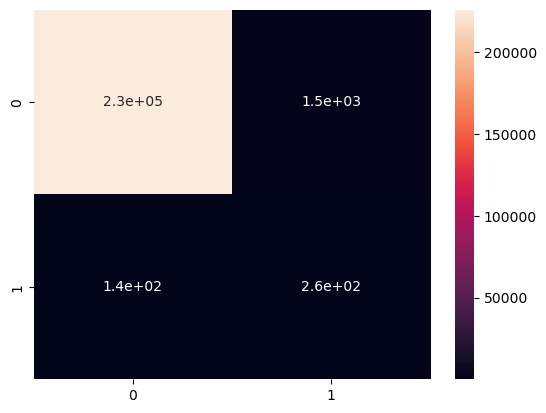

In [29]:
y_predict_train = NB_classifier.predict(X_train)
y_predict_train
cm = confusion_matrix(y_train, y_predict_train)
sns.heatmap(cm, annot=True)  #Predicting the train result

<AxesSubplot:>

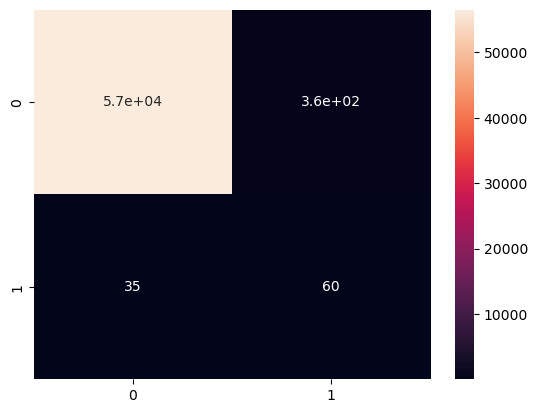

In [30]:
# Predicting the Test set results
y_predict_test = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict_test)
sns.heatmap(cm, annot=True)

In [31]:
print(classification_report(y_test, y_predict_test))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00     56867
           1       0.14      0.63      0.23        95

    accuracy                           0.99     56962
   macro avg       0.57      0.81      0.62     56962
weighted avg       1.00      0.99      1.00     56962



### STEP#6: IMPROVING THE MODEL

In [32]:
X = creditcard_df.drop(['Time','V8','V13','V15','V20','V22','V23','V24','V25','V26','V27','V28','Class'], axis = 1)

In [33]:
X

,V1,V2,V3,V4,V5,V6,V7,V9,V10,V11,V12,V14,V16,V17,V18,V19,V21,Amount_Norm
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.363787,0.090794,-0.551600,-0.617801,-0.311169,-0.470401,0.207971,0.025791,0.403993,-0.018307,0.244964
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,-0.255425,-0.166974,1.612727,1.065235,-0.143772,0.463917,-0.114805,-0.183361,-0.145783,-0.225775,-0.342475
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,-1.514654,0.207643,0.624501,0.066084,-0.165946,-2.890083,1.109969,-0.121359,-2.261857,0.247998,1.160686
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,-1.387024,-0.054952,-0.226487,0.178228,-0.287924,-1.059647,-0.684093,1.965775,-1.232622,-0.108300,0.140534
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,0.817739,0.753074,-0.822843,0.538196,-1.119670,-0.451449,-0.237033,-0.038195,0.803487,-0.009431,-0.073403
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
284802,-11.881118,10.071785,-9.834783,-2.066656,-5.364473,-2.606837,-4.918215,1.914428,4.356170,-1.593105,2.711941,4.626942,1.107641,1.991691,0.510632,-0.682920,0.213454,-0.350151
284803,-0.732789,-0.055080,2.035030,-0.738589,0.868229,1.058415,0.024330,0.584800,-0.975926,-0.150189,0.915802,-0.675143,-0.711757,-0.025693,-1.221179,-1.545556,0.214205,-0.254117
284804,1.919565,-0.301254,-3.249640,-0.557828,2.630515,3.031260,-0.296827,0.432454,-0.484782,0.411614,0.063119,-0.510602,0.140716,0.313502,0.395652,-0.577252,0.232045,-0.081839
284805,-0.240440,0.530483,0.702510,0.689799,-0.377961,0.623708,-0.686180,0.392087,-0.399126,-1.933849,-0.962886,0.449624,-0.608577,0.509928,1.113981,2.897849,0.265245,-0.313249


<AxesSubplot:>

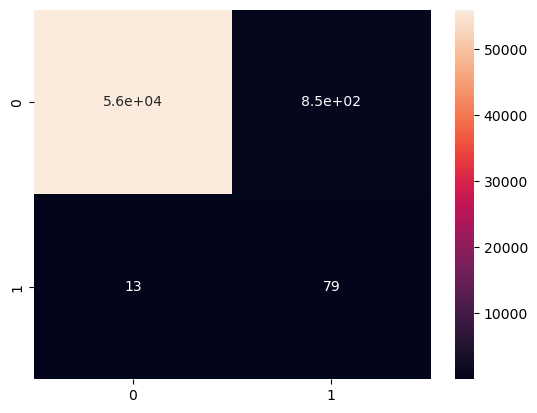

In [34]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)
NB_classifier = GaussianNB()
NB_classifier.fit(X_train, y_train)
y_predict = NB_classifier.predict(X_test)
cm = confusion_matrix(y_test, y_predict)
sns.heatmap(cm, annot=True)

In [35]:
print(classification_report(y_test, y_predict))

              precision    recall  f1-score   support

           0       1.00      0.99      0.99     56870
           1       0.08      0.86      0.15        92

    accuracy                           0.98     56962
   macro avg       0.54      0.92      0.57     56962
weighted avg       1.00      0.98      0.99     56962



In [36]:
print("Number of fraud points in the testing dataset = ", sum(y_test))

Number of fraud points in the testing dataset =  92
